In [1]:
id = '15033'

In [2]:
import pystain

In [3]:
ds = pystain.StainDataset(id)

/home/gdholla1/data/post_mortem/new_data_format/15033/images.hdf5


In [4]:
slice = ds.slices[len(ds.slices) / 2 +2]

In [17]:
calr = ds.data[ds._get_index_slice(slice), ..., ds.stains.index('CALR')]
parv = ds.data[ds._get_index_slice(slice), ..., ds.stains.index('PARV')]
smi32 = ds.data[ds._get_index_slice(slice), ..., ds.stains.index('SMI32')]

In [18]:
sns.set_context('poster')

In [19]:
from scipy import ndimage

In [20]:
t1 = ds.h5file['T1_in_stain_space'][ds._get_index_slice(slice), ...]
t2star = ds.h5file['T2star_in_stain_space'][ds._get_index_slice(slice), ...]
qsm = ds.h5file['QSM_in_stain_space'][ds._get_index_slice(slice), ...]

In [21]:
t2star = np.ma.masked_outside(t2star, 1, 100)
t1 = np.ma.masked_outside(t1, 100, 800)
qsm = np.ma.masked_outside(qsm, -0.5, 0.5)

In [22]:
xlim = (600, 1500)
ylim = 1750, 1000

In [23]:
sns.set_style('white')

In [24]:
lw = 1

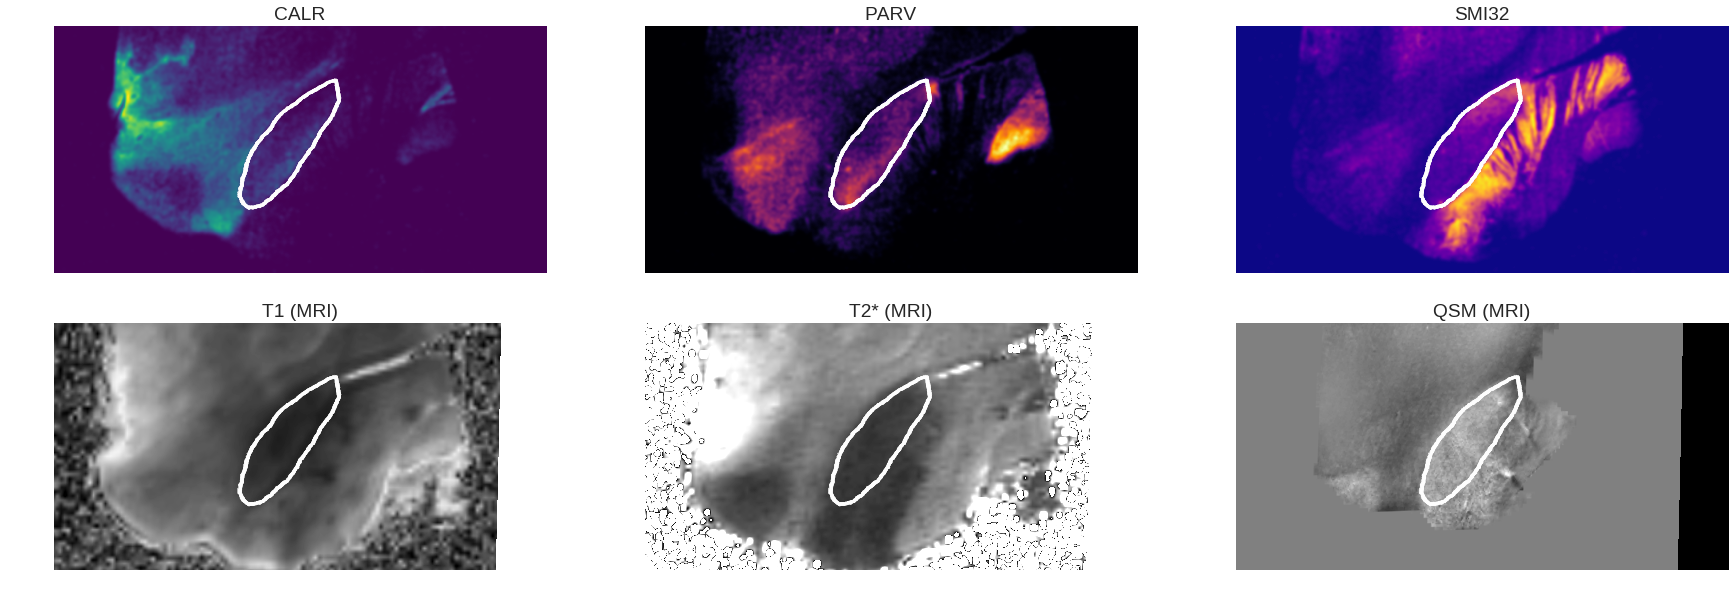

In [25]:
ax = plt.subplot(231)
plt.imshow(ndimage.gaussian_filter(calr, 5), cmap=plt.cm.viridis, interpolation='nearest')
plt.contour(ds.thresholded_mask[ds._get_index_slice(slice)], colors=['white'], lw=lw, alpha=0.5)

plt.xlim(*xlim)
plt.ylim(*ylim)

plt.title('CALR')
# plt.axis('off')

plt.subplot(232, sharex=ax, sharey=ax)
plt.imshow(ndimage.gaussian_filter(parv, 5), cmap=plt.cm.inferno, interpolation='nearest')
plt.contour(ds.thresholded_mask[ds._get_index_slice(slice)], colors=['white'], lw=lw, alpha=0.5)
plt.axis()
plt.title('PARV')

plt.subplot(233, sharex=ax, sharey=ax)
plt.imshow(ndimage.gaussian_filter(smi32, 5), cmap=plt.cm.plasma, interpolation='nearest')
plt.contour(ds.thresholded_mask[ds._get_index_slice(slice)], colors=['white'], lw=lw, alpha=0.5)
plt.title('SMI32')

plt.subplot(234, sharex=ax, sharey=ax)
plt.imshow(t1, cmap=plt.cm.gray, vmin=150, vmax=800, interpolation='nearest')
plt.contour(ds.thresholded_mask[ds._get_index_slice(slice)], colors=['white'], lw=lw, alpha=0.5)
plt.title('T1 (MRI)')


ax_ = plt.subplot(235, sharex=ax, sharey=ax)
plt.imshow(t2star, cmap=plt.cm.gray, vmin=0, vmax=50, interpolation='nearest')
plt.contour(ds.thresholded_mask[ds._get_index_slice(slice)], colors=['white'], lw=lw, alpha=0.5)
ax_.patch.set_facecolor('black')
plt.title('T2* (MRI)')

plt.subplot(236, sharex=ax, sharey=ax)
plt.imshow(qsm, cmap=plt.cm.gray, vmin=-0.2, vmax=0.2, interpolation='nearest')
plt.contour(ds.thresholded_mask[ds._get_index_slice(slice)], colors=['white'], lw=lw, alpha=0.5)
plt.title('QSM (MRI)')

ax.set_xlim(*xlim)
ax.set_ylim(*ylim)


plt.gcf().set_size_inches(30, 10)

for ax in plt.gcf().axes:
    ax.axis('off')

plt.savefig('/home/gdholla1/projects/post_mortem/reports/figures/representative_outline.pdf')